To-do:
•	Find out those columns which contain missing values – they might also contain some data entry errors. 
•	If you are able to detect any data entry error in any column with missing values, then convert these erroneous values to missing values forcibly (so that we can deal with them in the next step through MVA).
•	Now do MVA to seal with all missing values by using concepts taught in the class (and their relevant charts of missing no module)
o	Interpret each chart in 1-2 sentences
o	Define and justify your MVA strategy for each column

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plot
!pip install missingno
import missingno as mano
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [3]:
NYC = pd.read_csv("nyc-rolling-sales-dirty.csv")

C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
NYC

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00


In [5]:
NYC.isnull().sum()
#let's begin with summing all the null values in their respective columns

Unnamed: 0                         0
BOROUGH                            0
NEIGHBORHOOD                      30
BUILDING CLASS CATEGORY           51
TAX CLASS AT PRESENT               7
BLOCK                             16
LOT                                0
EASE-MENT                          0
BUILDING CLASS AT PRESENT          0
ADDRESS                           45
APARTMENT NUMBER                   1
ZIP CODE                          36
RESIDENTIAL UNITS                  0
COMMERCIAL UNITS                   0
TOTAL UNITS                        0
LAND SQUARE FEET                   0
GROSS SQUARE FEET                  0
YEAR BUILT                         0
TAX CLASS AT TIME OF SALE          0
BUILDING CLASS AT TIME OF SALE     0
SALE PRICE                         0
SALE DATE                          0
dtype: int64

In [8]:
#checking data types for all columns
NYC.dtypes

Unnamed: 0                          int64
BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                             float64
LOT                                object
EASE-MENT                          object
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
APARTMENT NUMBER                   object
ZIP CODE                          float64
RESIDENTIAL UNITS                   int64
COMMERCIAL UNITS                    int64
TOTAL UNITS                         int64
LAND SQUARE FEET                   object
GROSS SQUARE FEET                  object
YEAR BUILT                          int64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                         object
SALE DATE                          object
dtype: object

In [10]:
#except for TAX CLASS AT PRESENT, all other columns seem to deal with location, so dealing with TAX CLASS AT PRESENT first.
NYC.loc[NYC['TAX CLASS AT PRESENT']==' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
74,78,1,ALPHABET CITY,11A CONDO-RENTALS,,394.0,1602,,,183-189 AVENUE B,...,0,0,0,-,-,0,2,RR,8058923,8/9/2017 0:00
198,202,1,ALPHABET CITY,42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,,394.0,1601,,,183-189 AVENUE B,...,0,0,0,-,-,0,4,RA,-,8/9/2017 0:00
573,577,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699.0,1306,,,510 WEST 28TH STREET,...,0,0,0,-,-,0,2,R4,7165843,8/9/2017 0:00
574,578,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699.0,1309,,,510 WEST 28TH STREET,...,0,0,0,-,-,0,2,R4,4937073,8/2/2017 0:00
575,579,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,,699.0,1311,,,520 WEST 28TH STREET,...,0,0,0,-,-,0,2,R4,6033271,6/27/2017 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66425,17027,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,,268.0,1050,,,27-21 44TH DRIVE,...,0,0,0,-,-,0,2,R4,809508,8/30/2017 0:00
66426,17028,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,,268.0,1057,,,27-21 44TH DRIVE,...,0,0,0,-,-,0,2,R4,911333,8/23/2017 0:00
66690,17292,4,LONG ISLAND CITY,47 CONDO NON-BUSINESS STORAGE,,268.0,1151,,,27-21 44TH DRIVE,...,0,0,0,-,-,0,4,RS,20080,8/25/2017 0:00
73889,24491,4,SPRINGFIELD GARDENS,05 TAX CLASS 1 VACANT LAND,,12529.0,220,,,NA 172ND STREET,...,0,0,0,-,-,0,1,V0,3500000,7/27/2017 0:00


In [12]:
NYC['TAX CLASS AT PRESENT'].isnull().sum()

7

In [21]:
#there are only 7 null values in 'TAX CLASS AT PRESENT' column. That's a problem
NYC['TAX CLASS AT PRESENT'].replace(' ', np.NaN, inplace=True)

In [22]:
NYC['TAX CLASS AT PRESENT'].isnull().sum()
#now the 7 null values, and the 738 blank values are all categorized as one

745

In [25]:
NYC.loc[NYC['BLOCK']==' ']
#no blank values for BLOCK

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [26]:
NYC['BLOCK'].isnull().sum()
#There are 16 null values, but they are already classified as Null

16

In [27]:
NYC[NYC['APARTMENT NUMBER']==' ']
#while APARTMENT NUMBER only has one null value, over half of its values are blank
#These are MCAR. We can discard them without having the dataset be compromised

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,405.0,16,,C4,NaN,...,20,0,20,2581,9730,1900,2,C4,-,later
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,11/28/2016 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349.0,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,4/21/2017 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351.0,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,7/5/2017 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100.0,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/2016 0:00


In [28]:
del(NYC['APARTMENT NUMBER'])

In [29]:
NYC.head(10)
#APARTMENT NUMBER deleted

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399.0,26,,C7,NaN,...,28,3,31,4616,18690,1900,2,C7,-,12/14/2016 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,399.0,39,,C7,NaN,...,16,1,17,2212,7803,1900,2,C7,-,12/9/2016 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,402.0,21,,C4,NaN,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,404.0,55,,C2,NaN,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,405.0,16,,C4,NaN,...,20,0,20,2581,9730,1900,2,C4,-,later
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,406.0,32,,C4,NaN,...,8,0,8,1750,4226,1920,2,C4,3192840,9/23/2016 0:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,NaN,407.0,18,,C7,NaN,...,44,2,46,5163,21007,1900,2,C7,-,7/20/2017 0:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,NaN,379.0,34,,D5,NaN,...,15,0,15,1534,9198,1920,2,D5,-,6/20/2017 0:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387.0,153,,D9,NaN,...,24,0,24,4489,18523,1920,2,D9,16232000,11/7/2016 0:00


In [30]:
#ADDRESS showing a lot of null values. 45 null values according to previous calculation.
#Let's explore further
NYC[NYC['ADDRESS']==' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [32]:
#Thankfully, there are no blank values in ADDRESS that need correcting
#LOT shows a value in the beginning 'No Number', while it shows no null values in previous calculation
NYC[NYC['LOT']=='No Number']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392.0,No Number,,65000,NaN,...,5,0,5,1633,6440,1900,2,C2,6625000,why
553,557,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,695.0,No Number,,R4,555 WEST 23RD STREET,...,1,0,1,-,-,2005,2,R4,1700000,12/2/2016 0:00
967,971,1,CHELSEA,43 CONDO OFFICE BUILDINGS,4,803.0,No Number,,RB,305 SEVENTH AVENUE,...,0,0,1,-,-,0,4,RB,-,12/15/2016 0:00
1519,1523,1,CLINTON,10 COOPS - ELEVATOR APARTMENTS,2,1067.0,No Number,,D4,"457 WEST 57TH STREET, 804",...,0,0,0,-,-,1929,2,D4,381565,8/16/2017 0:00
2003,2007,1,FASHION,13 CONDOS - ELEVATOR APARTMENTS,2,762.0,No Number,,R4,502 9TH AVENUE,...,1,0,1,-,-,2005,2,R4,735000,9/22/2016 0:00
2509,2513,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,68.0,No Number,,R4,80 JOHN STREET,...,1,0,1,-,-,1927,2,R4,825000,1/23/2017 0:00
2601,2605,1,FLATIRON,10 COOPS - ELEVATOR APARTMENTS,2,816.0,No Number,,D4,"10 WEST 15TH STREET, 2022",...,0,0,0,-,-,1964,2,D4,875000,1/18/2017 0:00
2624,2628,1,FLATIRON,10 COOPS - ELEVATOR APARTMENTS,2,817.0,No Number,,D4,"16 WEST 16TH STREET, 1UN",...,0,0,0,-,-,1964,2,D4,685000,1/10/2017 0:00
56295,6897,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5246.0,No Number,,A1,33-80 162ND STREET,...,1,0,1,8000,3984,1930,1,A1,1600000,12/30/2016 0:00


In [36]:
#Just 9 No Number values in LOT
NYC['LOT'].replace('No Number', np.NaN, inplace = True)

In [37]:
NYC['LOT'].isnull().sum()
#All the No Number values have been converted to null values

9

In [38]:
#Converting all the values to numeric
NYC['LOT']=pd.to_numeric(NYC['LOT'])

ValueError: Unable to parse string "v" at position 2647

In [39]:
#There is still a non-numeric value present
NYC[NYC['LOT']=='v']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
2647,2651,1,FLATIRON,10 COOPS - ELEVATOR APARTMENTS,2,825.0,v,,D0,"40 WEST 24TH STREET, 7N",...,0,0,0,-,-,1905,2,D0,2950000,10/14/2016 0:00


In [40]:
NYC['LOT'].replace('v', np.NaN, inplace = True)

In [41]:
NYC[NYC['LOT']=='v']
#string value erased from column

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [42]:
#Converting all the values to numeric
NYC['LOT']=pd.to_numeric(NYC['LOT'])

In [43]:
#Checking all other columns for blank values
NYC[NYC['BOROUGH'] == ' ']
#no blank values for BOROUGH

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [44]:
NYC[NYC['NEIGHBORHOOD'] == ' ']
#no blank values for NEIGHBORHOOD column

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [45]:
NYC[NYC['BUILDING CLASS CATEGORY'] == ' ']
#no blank values for BUILDING CLASS CATEGORY

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [48]:
NYC[NYC['EASE-MENT'] == ' ']
#all blank values for EASE-MENT so deleting this column
del(NYC['EASE-MENT'])

In [49]:
NYC[NYC['BUILDING CLASS AT PRESENT'] == ' ']
#no null values, but 738 blank values for BUILDING CLASS AT PRESENT
#replacing null values here

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
74,78,1,ALPHABET CITY,11A CONDO-RENTALS,NaN,394.0,1602.0,,183-189 AVENUE B,0.0,0,0,0,-,-,0,2,RR,8058923,8/9/2017 0:00
198,202,1,ALPHABET CITY,42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,NaN,394.0,1601.0,,183-189 AVENUE B,0.0,0,0,0,-,-,0,4,RA,-,8/9/2017 0:00
573,577,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,NaN,699.0,1306.0,,510 WEST 28TH STREET,10001.0,0,0,0,-,-,0,2,R4,7165843,8/9/2017 0:00
574,578,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,NaN,699.0,1309.0,,510 WEST 28TH STREET,10001.0,0,0,0,-,-,0,2,R4,4937073,8/2/2017 0:00
575,579,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,NaN,699.0,1311.0,,520 WEST 28TH STREET,0.0,0,0,0,-,-,0,2,R4,6033271,6/27/2017 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66425,17027,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,NaN,268.0,1050.0,,27-21 44TH DRIVE,11101.0,0,0,0,-,-,0,2,R4,809508,8/30/2017 0:00
66426,17028,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,NaN,268.0,1057.0,,27-21 44TH DRIVE,11101.0,0,0,0,-,-,0,2,R4,911333,8/23/2017 0:00
66690,17292,4,LONG ISLAND CITY,47 CONDO NON-BUSINESS STORAGE,NaN,268.0,1151.0,,27-21 44TH DRIVE,11101.0,0,0,0,-,-,0,4,RS,20080,8/25/2017 0:00
73889,24491,4,SPRINGFIELD GARDENS,05 TAX CLASS 1 VACANT LAND,NaN,12529.0,220.0,,NA 172ND STREET,0.0,0,0,0,-,-,0,1,V0,3500000,7/27/2017 0:00


In [51]:
NYC['BUILDING CLASS AT PRESENT'].replace(' ', np.NaN, inplace = True)
NYC['BUILDING CLASS AT PRESENT'].isnull().sum()
#success

738

In [53]:
NYC[NYC['ZIP CODE'] == ' ']
NYC['ZIP CODE'].shape

(84548,)

In [54]:
NYC[NYC['RESIDENTIAL UNITS'] == ' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [55]:
NYC[NYC['COMMERCIAL UNITS'] == ' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [56]:
NYC[NYC['TOTAL UNITS'] == ' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [57]:
NYC[NYC['LAND SQUARE FEET'] == ' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [58]:
NYC[NYC['GROSS SQUARE FEET'] == ' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [59]:
NYC[NYC['YEAR BUILT'] == ' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [61]:
NYC[NYC['TAX CLASS AT TIME OF SALE'] == ' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [62]:
NYC[NYC['BUILDING CLASS AT TIME OF SALE'] == ' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [63]:
NYC[NYC['SALE PRICE'] == ' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [64]:
NYC[NYC['SALE DATE'] == ' ']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [65]:
#all columns purged of blank values

In [66]:
#Columns LAND SQUARE FEET and GROSS SQUARE FEET have '-' values. Need to replace them

In [67]:
NYC['LAND SQUARE FEET'].replace('-', np.NaN, inplace = True)
NYC['GROSS SQUARE FEET'].replace('-', np.NaN, inplace = True)

In [68]:
NYC[NYC['GROSS SQUARE FEET']== '-']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [69]:
NYC[NYC['LAND SQUARE FEET']== '-']

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE


In [70]:
#both columns purged of '-' values

In [71]:
#SALE DATE has string values
NYC['SALE DATE'].value_counts()

6/29/2017 0:00     544
6/15/2017 0:00     530
12/22/2016 0:00    527
5/25/2017 0:00     511
10/6/2016 0:00     508
                  ... 
8/13/2017 0:00       1
why                  1
6/4/2017 0:00        1
not sure             1
later                1
Name: SALE DATE, Length: 367, dtype: int64

In [74]:
NYC['SALE DATE'].replace('why ', np.NaN, inplace = True)
NYC['SALE DATE'].replace('not sure', np.NaN, inplace = True)
NYC['SALE DATE'].replace('later', np.NaN, inplace = True)

In [75]:
NYC['SALE DATE'].value_counts()
#string values nullified

6/29/2017 0:00     544
6/15/2017 0:00     530
12/22/2016 0:00    527
5/25/2017 0:00     511
10/6/2016 0:00     508
                  ... 
11/27/2016 0:00      2
7/9/2017 0:00        2
1/8/2017 0:00        2
8/13/2017 0:00       1
6/4/2017 0:00        1
Name: SALE DATE, Length: 364, dtype: int64

<AxesSubplot:>

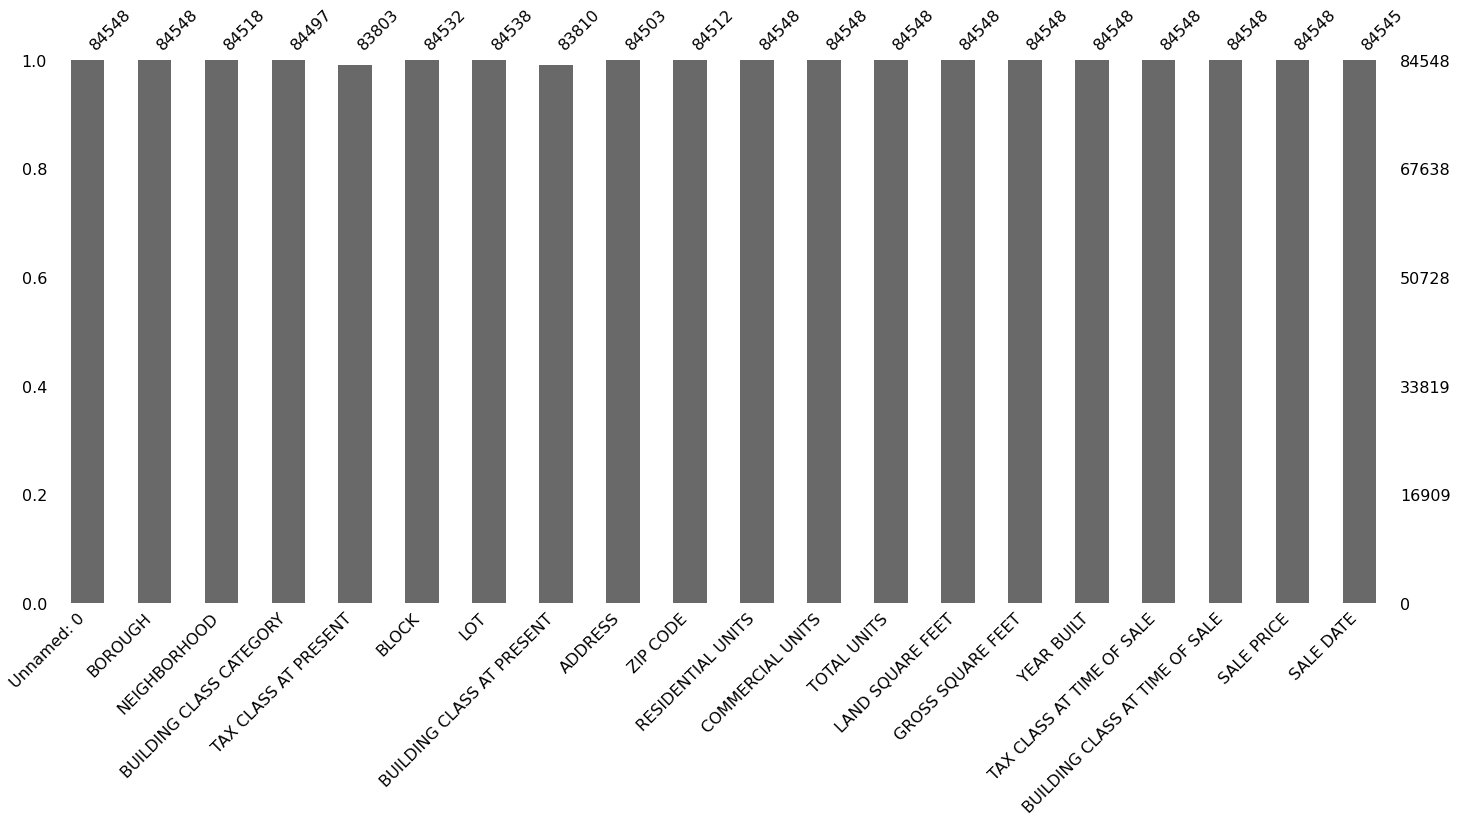

In [76]:
mano.bar(NYC)

In [77]:
#All columns have equal number of values now and none are missing

<AxesSubplot:>

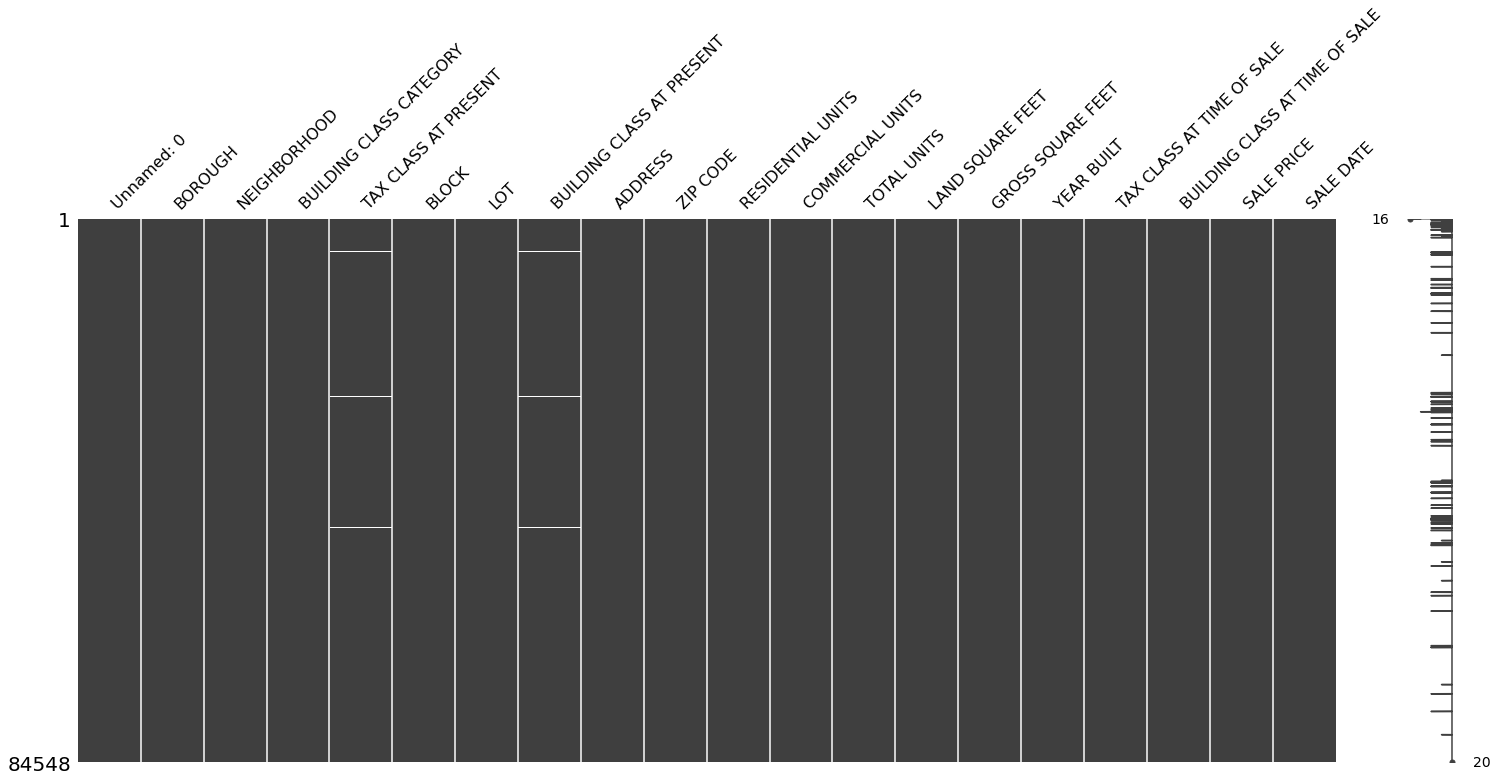

In [78]:
mano.matrix(NYC)

In [79]:
#TAX CLASS AT PRESENT and BUILDING CLASS AT PRESENT are clearly related

<AxesSubplot:>

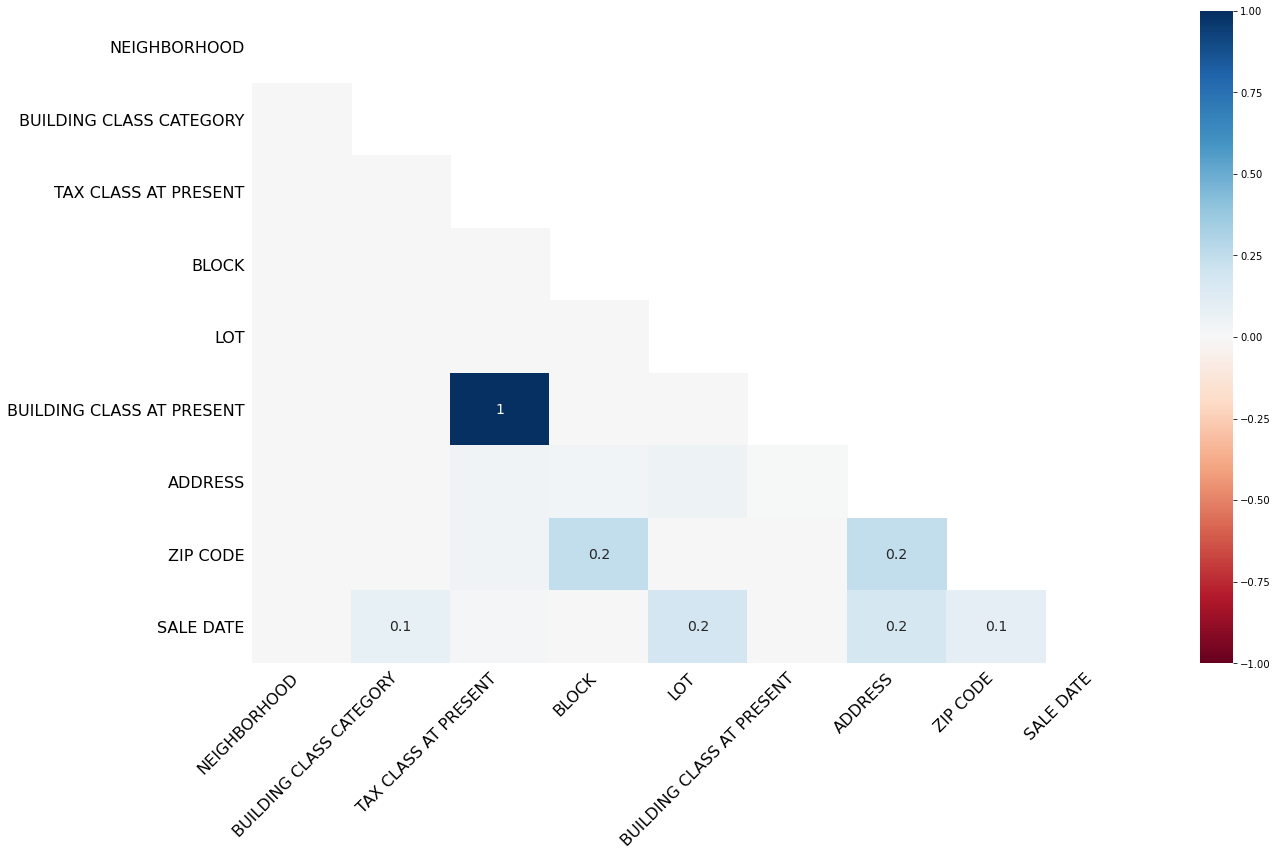

In [80]:
mano.heatmap(NYC)

In [81]:
#verified

<AxesSubplot:>

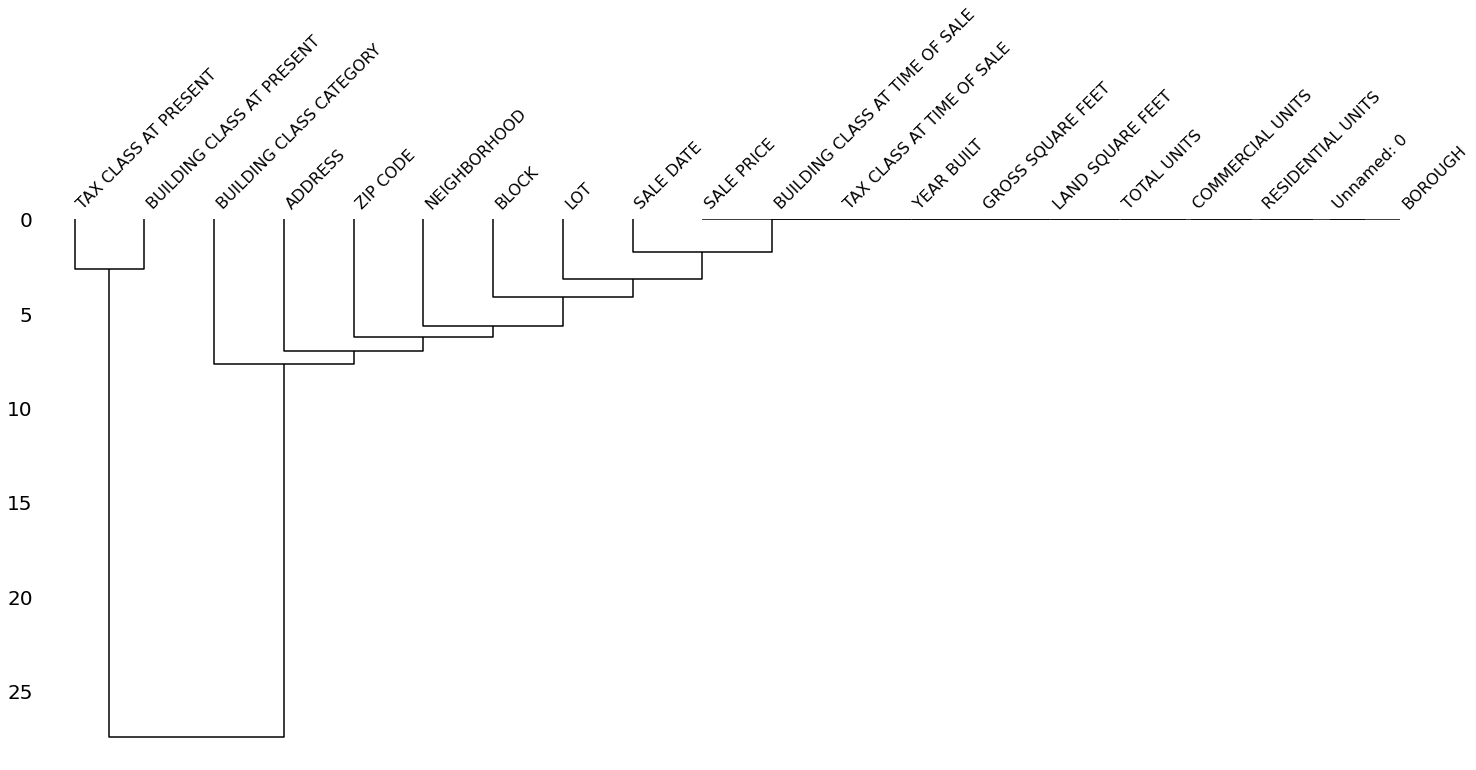

In [83]:
mano.dendrogram(NYC)

In [84]:
#confirmed again

In [86]:
#However, there are no clear numerical values to work with in these categories:
NYC['TAX CLASS AT PRESENT'].value_counts()

1     38633
2     30915
4      6140
2A     2520
2C     1915
1A     1444
1B     1234
2B      812
1C      186
3         4
Name: TAX CLASS AT PRESENT, dtype: int64

In [87]:
NYC['BUILDING CLASS AT PRESENT'].value_counts()

D4    12663
R4    12482
A1     6753
A5     5683
B2     4923
      ...  
R7        1
Z7        1
P7        1
CM        1
Y1        1
Name: BUILDING CLASS AT PRESENT, Length: 167, dtype: int64

In [ ]:
#There isn't much cleaning left to be done here. 